# 02 - Exploratory Data Analysis (EDA)

In this notebook, I explore the **cleaned student performance dataset** to understand patterns and relationships between study habits, resources, stress, and final grades.

The goals of this EDA are to:
- Inspect relationships between key **numeric features** (e.g., study hours, attendance, exam score).
- Compare how these numeric features vary across **final grade categories**.
- Examine how **categorical factors** such as motivation, stress level, and learning resources are distributed by final grade.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset and selecting numberic features

First, I loaded the cleaned dataset and idenify the numeric columns that are most relevant to academic performance.  These include:

- `StudyHours` - average hours spent studying
- `Attendance` - attendance percentage
- `Age` - student age
- `OnlineCourses` - number of online courses taken
- `AssignmentCompletion` - completion rate of assignments
- `ExamScore` - exam performance (continuous score)

These feature will be used to compute correlations and to visualize how their distributions change across final grade categories.


In [ ]:
data = pd.read_csv("../data/cleaned_student_performance.csv")

numeric_cols = ['StudyHours', 'Attendance', 'Age', 'OnlineCourses', 'AssignmentCompletion', 'ExamScore']

corr = data[numeric_cols].corr()

## Correlation between numeric features

To understand how numeric variables relate to one another, we will compute a **correlation matrix** and visualize it with a heatmap.

This helps answer questions such as:

- Do more study hours relate to higher exam scores?
- Is higher attendance associated with better assignment completion?
- Are certain features redundant becaus they are highly correlated?

Dark red cells indicate strong positive correlations, while dark blue cells indicate strong negative correlations.

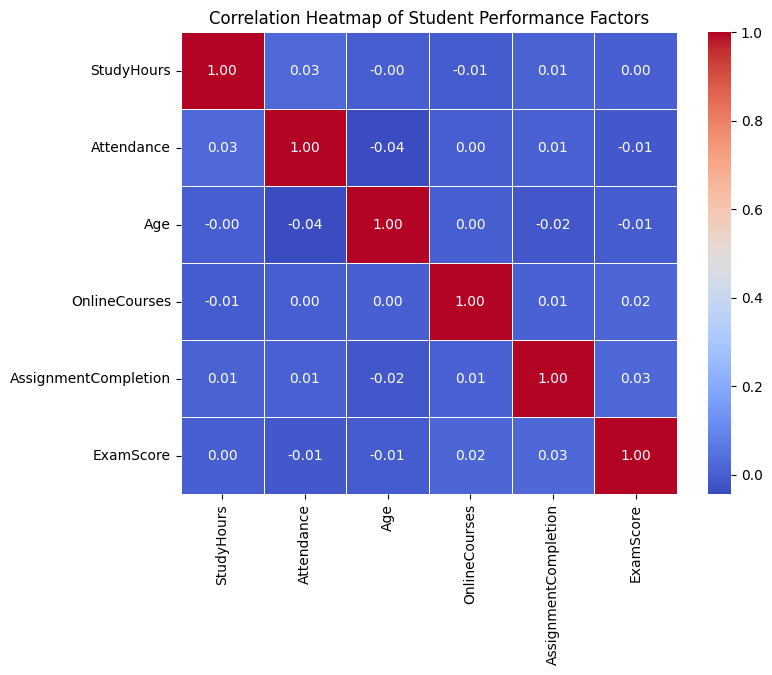

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Student Performance Factors")
plt.show()

### Correlation Heatmap Insights

The numeric features in the dataset show **very weak linear correlations** with each other.
None of the behavior or demographic variables (study hours, attendance, online courses, assignments) correlate strongly with one another or with exam scores.

This suggests:
- Each feature captures a **different aspect of student behavior**
- Performance patterns are likely driven by **multiple independent factors**, not one dominant variable
- Clustering or sementation may reveal more than simple correlations

## Distribution of numeric features by final grade

Finally, I examine several **categorical variables**:

- `Motivation`
- `StressLevel`
- `Internet` 
- `Resources`
- `LearningStyle`
- `Discussions`

For each feature, I plot a **countplot** with bars broken down by `FinalGrade`.

These plots show how the final grade is distributed across different categories. For example:

- Are highly motivated student more likely to earn higher grades?
- Do students with high stress levels cluster in lower grade categories?
- Does consistent internet access or richer resources relate to better outcomes?

This helps identify which non-numeric, behavioral or contextual factors are associated with student performance.

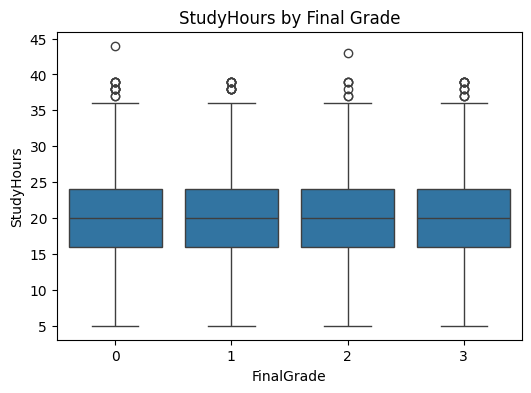

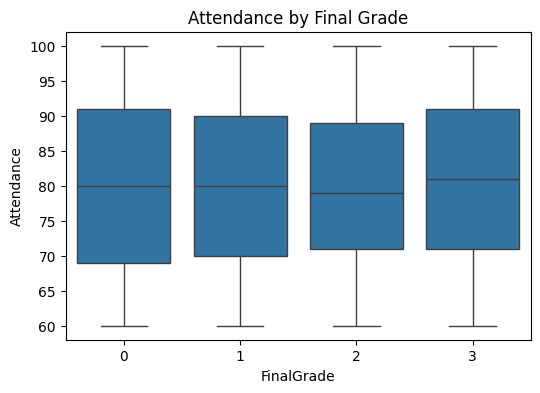

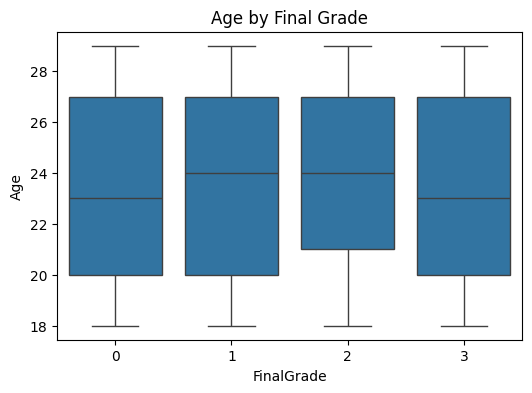

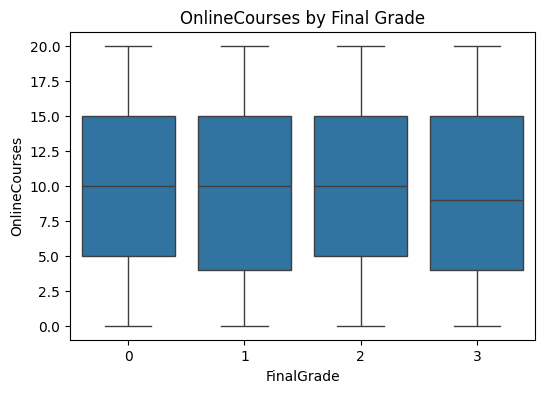

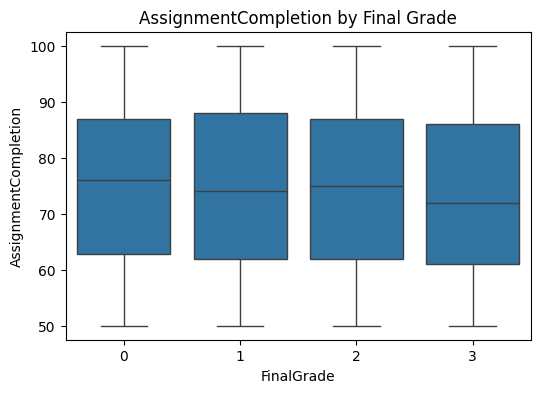

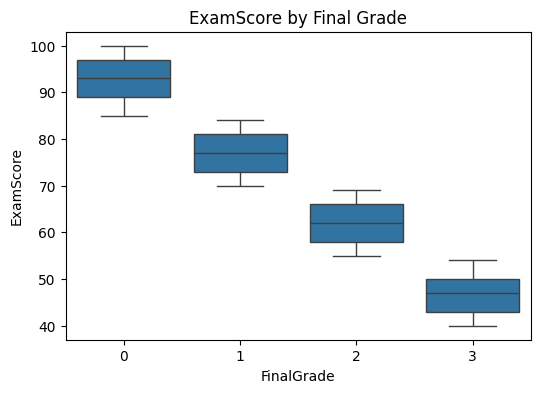

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data['FinalGrade'], y=data[col])
    plt.title(f"{col} by Final Grade")
    plt.show()

### Boxplot Obsevations
- StudyHours: similar across grades
- Attendance: small upward trend in higher groups
- Age: not related to performance
- Online Courses: no visible impact
- AssignmentCompletion: higher in top students
- ExamScore: biggest separation across groups

<function matplotlib.pyplot.show(close=None, block=None)>

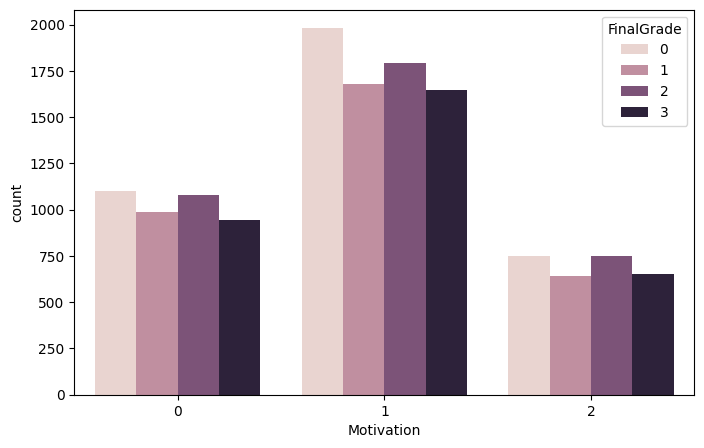

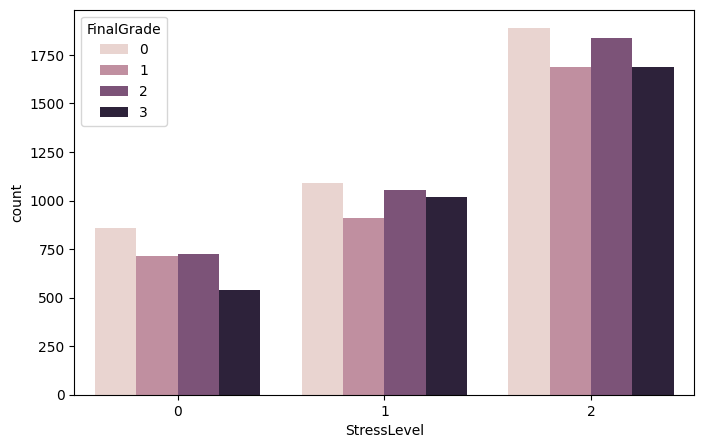

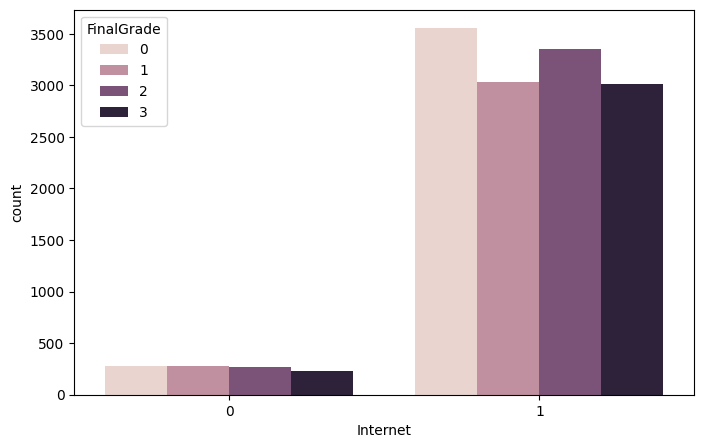

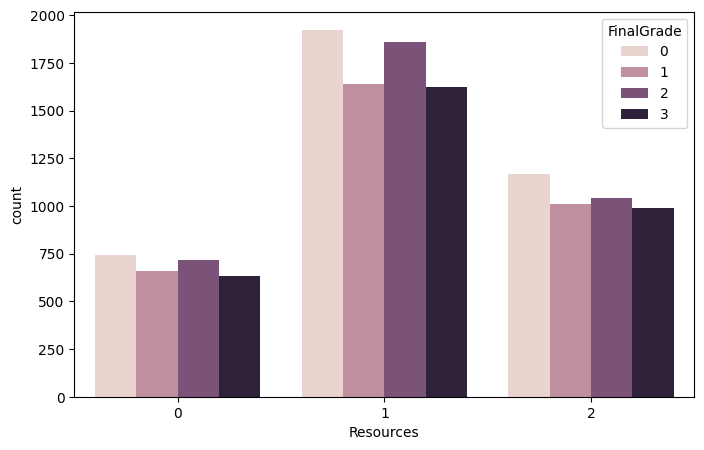

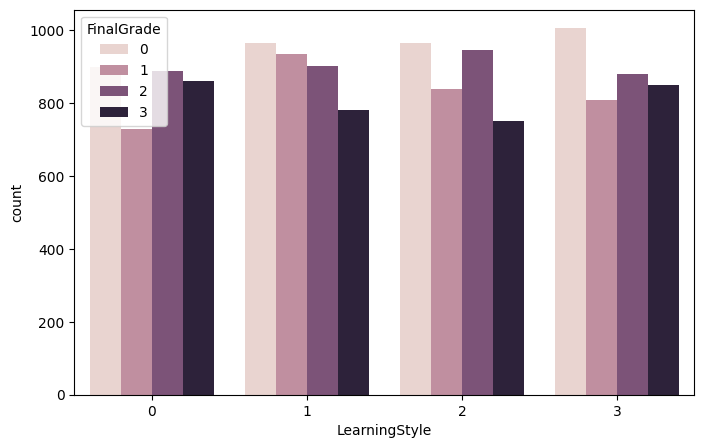

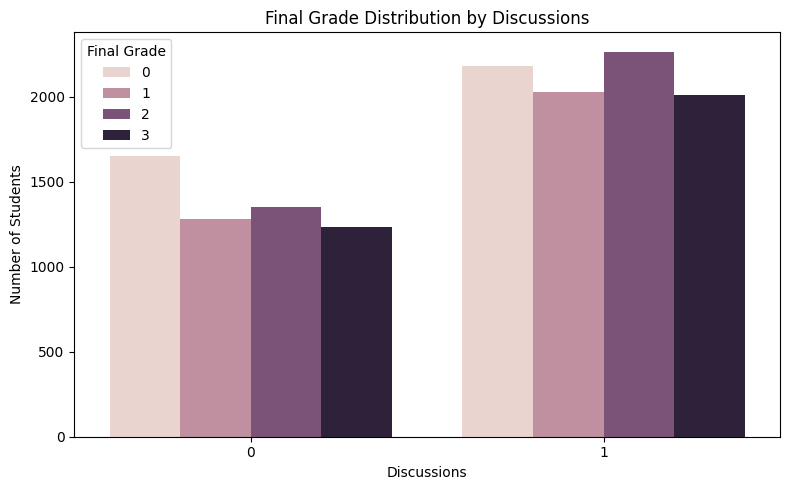

In [17]:
categorical_features = [
    "Motivation",
    "StressLevel",
    "Internet",
    "Resources",
    "LearningStyle",
    "Discussions"
]

for feature in categorical_features:
    plt.figure(figsize=(8,5))
    sns.countplot(
        data=data,
        x=feature,
        hue="FinalGrade"
    )

plt.title(f"Final Grade Distribution by {feature}")
plt.xlabel(feature)
plt.ylabel("Number of Students")
plt.legend(title="Final Grade")
plt.tight_layout()
plt.show

## Summary of Categorical Feature Exploration
Across the categorical variables (Motivation, StressLevel, Resources, Internet, LearningStyle, Discussions), most factors show **broadly similar distributions** across final grade categories.  This suggests they do not strongly separate high performers from lower-performing students when viewed independently.

Key notes:
- **Motivation & StressLevel** are high across all student groups.  These factors seem to be shared experiences rather than predictors of outcomes.
- **Resources & InternetAccess** are fairly even across grades. Having more support or better internet does not guarantee better performance.
- **LearningStyle** appears in all grade outcomes, showing no specific style preference linked to higher grades
- **Discussion participation** is the **clearest categorical differentiator**: students who engage in discussions are more likely to fall into higher grade groups.

Overall, categorical variables do not change dramatically across grade levels, with the exception of **engagement (Discussions)**, which may reflect habits that support stronger academic outcomes.

## Key Takeaways form the Exploratory Data Analysis

The EDA revealed sever important patterns in how students' behaviors, access, and habits relate to final outcomes.

### 1. ExamScore is the strongest indicaor of FinalGrade
Exam performance cleanly separates the four grade groups, unlike most other variables. However, it is a **lagging measure**, by the time the score exists, outcomes are already set. This makes it less useful as an *early intervention metric*.

### 2. Study habits alone do not explain student success
Study hours, attendence, assignment completion, and online courses show only **small differences** across grade levels. Students with similar habits often end up with very different results, suggesting:
- **quality > quantity**
- how students work may matter more than how long they work

### 3. Demographic/contextual factors are not the main drivers
Age, resources, learning style, internet, and eve motivation are **distributed evenly** across grades. This points to performance differences arising from **student behaviors and engagement**, not background traits.

### 4. Engagement appears to be meaningful signal
Among the categorical features, **discussion participation** stands out as the most consistent difference:
- Students who engage are more likely to earn higher grades
- Non-engaging groups show higher representation in lower grade tiers

This may suggest that small but consistent actions (e.g., participating, asking questions, connecting with peers) help sustain better outcomes.

---

### Overall Conclusion

Student success in this dataset is **not explained by a single variable**.
Most features show overlapping distributions across grade levels, reflecting complex drivers of academic performance.

While exam scores clearly distinguish performance groups, the **don't provide early insight or actionable feedback**.

This EDA supports exploring:
- **Student clustering** (to find hidden groups with shared patterns)
- **Predictive models** (to combine small signal into stronger insights)
- **Behavioral factors** that can be encouraged during a course, such as discussion participation or assignment completion consistency.

In short:
- **Grades are the outcome, not the cause**.
- To support students earlier, we need to look beyond the final exam and uncover deeper behavioral patterns.